<a href="https://colab.research.google.com/github/bhatnira/Classification-Models-Acetylcholinesterase-Inhibitor-Discovery/blob/main/ModelInterpretation_GraphConvolutionalNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Graph Convolution Model Interpretation

#Model Interpretation for graph Convolutional Model

## Data loading and Preprocessing



In [1]:
# For Reporducibility
import numpy as np
np.random.seed(42)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install --pre deepchem
import deepchem
deepchem.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 26.8 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.8.1.dev'

In [4]:
import deepchem as dc
import numpy as np

##Primary Dataset

In [5]:
# Load dataset
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/StandarizationOfDataset/StandarizedSmiles_cutOFF800daltonMolecularweight (1).xlsx')
df.head(5)

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
1,CHEMBL207777,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,97.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88190>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.014164,-1.325272,-63.027809,-53.765778,325.364,1,Cc1ccccc1NC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
2,CHEMBL205967,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2,2420.0,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88270>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.235565,-1.559108,-61.968063,-54.078575,263.293,1,CCNC(=O)Oc1ccc2c(c1)[C@]1(C)CO[C@@H](C1)O2
3,CHEMBL60119,Cc1ccc2c(N)c3c(nc2c1)CCCC3,100.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e88430>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,2.705664,0.148113,57.758297,-8.911607,212.296,4,Cc1ccc2c(N)c3c(nc2c1)CCCC3
4,CHEMBL294525,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2,290.0,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e884a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.600017,-0.978574,61.242554,5.783804,341.455,3,CCCCCCCNc1c2c(nc3cc([N+](=O)[O-])ccc13)CCCC2


# Loading the model

In [16]:
import tensorflow as tf

tf.keras.backend.clear_session()

import torch

torch.cuda.empty_cache()

In [18]:
model = GraphConvModel(n_tasks=1,model_dir="/content/drive/MyDrive/Classification Models /GraphConv_model_files")
model.restore()

## Cross species evaluation

### Upload and prep for species datasets
Species datasets: eel (CHEMBL4078), cow (CHEMBL4768), mouse (CHEMBL3199), ray (CHEMBL4780), mosquito (CHEMBL2046266), mouse (CHEMBL3198), and independent  human dataset containing molecules not present on  ChEMBL22  were obtained from Vignaux et al(2023) for validation and specificity inferences.

In [10]:
df_humanIndependent=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/CleanedTestDatasetSmiles/df_humanIndependent.xlsx')


### Featurization of smiles on species datasets - Grah Conv

### human Independent

In [11]:
df_humanIndependent.to_csv('inhibitor_HumanIndependent.csv', index=False)

In [12]:

# Define the ConvMolFeaturizer
featurizer = ConvMolFeaturizer()

# Featurize the SMILES column
features = featurizer.featurize(df_humanIndependent['cleanedMol'].tolist())
# Extract the target values from the DataFrame
targets = df_humanIndependent['binary_activities'].tolist()

# Create a DeepChem dataset from the features and targets
dataset_humanIndependent= dc.data.NumpyDataset(features, targets)

### Human Test and Independent dataset evaluation -- graph conv

Confusion Matrix for Human Test dataset:
[[341  19]
 [ 13 239]]
Confusion Matrix for Human Independent dataset:
[[116  22]
 [ 23  47]]


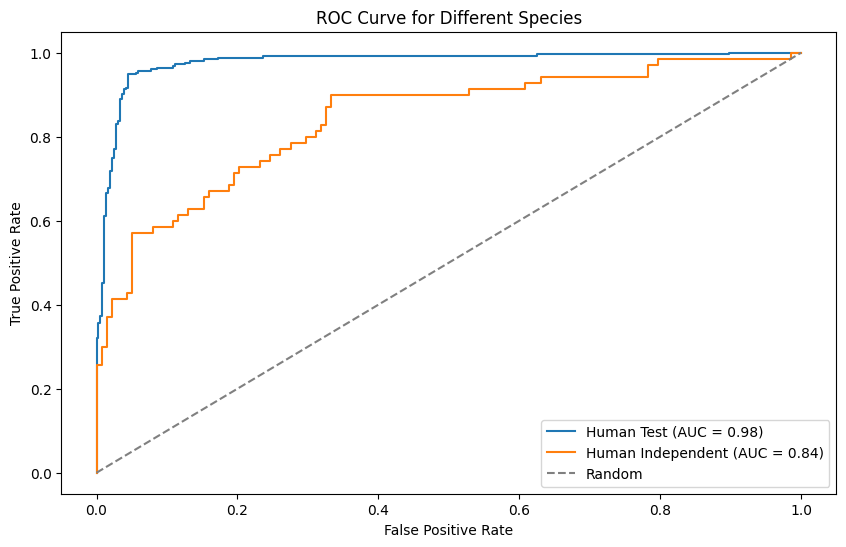

Evaluation for Human Test dataset:
Accuracy: 0.9477
Precision: 0.9264
Recall: 0.9484
F1 Score: 0.9373
MCC: 0.8926
Cohen's Kappa: 0.8924


Evaluation for Human Independent dataset:
Accuracy: 0.7837
Precision: 0.6812
Recall: 0.6714
F1 Score: 0.6763
MCC: 0.5138
Cohen's Kappa: 0.5138




In [19]:
import deepchem as dc
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_humanIndependent
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store evaluation metrics for each dataset
evaluation_metrics = {}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    X = data.X
    y_true = data.y.ravel()
    # Make predictions on the test dataset
    y_pred = model.predict(data).reshape(-1, 2)
    y_pred_positive = y_pred[:, 1]

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_positive)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Calculate the confusion matrix
    y_pred_binary = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    # Calculate other evaluation metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    mcc = matthews_corrcoef(y_true, y_pred_binary)
    cohen_kappa = cohen_kappa_score(y_true, y_pred_binary)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa
    }

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(conf_matrix)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create a DataFrame from the evaluation_metrics dictionary
df_metrics = pd.DataFrame(evaluation_metrics).transpose()

# Save the DataFrames to Excel files
df_metrics.to_excel('evaluation_metrics_graphConv.xlsx', index_label='Species')


Confusion Matrix for Human Test dataset:
[[341  19]
 [ 13 239]]
Confusion Matrix for Human Independent dataset:
[[116  22]
 [ 23  47]]


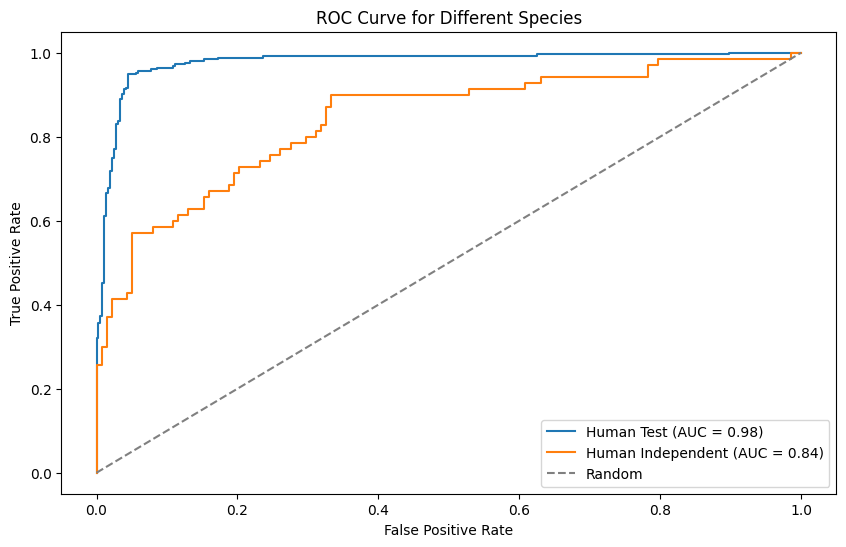

Evaluation for Human Test dataset:
Accuracy: 0.9477
Precision: 0.9264
Recall: 0.9484
F1 Score: 0.9373
MCC: 0.8926
Cohen's Kappa: 0.8924


Evaluation for Human Independent dataset:
Accuracy: 0.7837
Precision: 0.6812
Recall: 0.6714
F1 Score: 0.6763
MCC: 0.5138
Cohen's Kappa: 0.5138




,Binary_Prediction,Class_1_Prob,Class_0_Prob
0,1,0.991850,0.008150
1,1,0.941284,0.058716
2,1,0.960634,0.039366
3,1,0.643563,0.356437
4,1,0.660275,0.339725
...,...,...,...
203,0,0.070991,0.929009
204,0,0.027492,0.972508
205,1,0.930667,0.069333
206,1,0.949214,0.050785


In [30]:
import deepchem as dc
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score

datasets = {
    'Human Test': test_dataset,
    'Human Independent': dataset_humanIndependent
}

# Set up the plot
plt.figure(figsize=(10, 6))

# Initialize dictionaries to store evaluation metrics and predictions for each dataset
evaluation_metrics = {}
predictions = {
    'binary': {},
    'class_1': {},
    'class_0': {}
}

# Evaluate and plot ROC curve for each dataset
for species, data in datasets.items():
    X = data.X
    y_true = data.y.ravel()

    # Make predictions on the test dataset
    y_pred = model.predict(data).reshape(-1, 2)
    y_pred_positive = y_pred[:, 1]
    y_pred_negative = y_pred[:, 0]

    # Store predictions
    predictions['binary'][species] = np.argmax(y_pred, axis=1)
    predictions['class_1'][species] = y_pred_positive
    predictions['class_0'][species] = y_pred_negative

    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_positive)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Calculate the confusion matrix
    y_pred_binary = np.argmax(y_pred, axis=1)
    conf_matrix = confusion_matrix(y_true, y_pred_binary)

    # Calculate other evaluation metrics
    accuracy = accuracy_score(y_true, y_pred_binary)
    precision = precision_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary)
    f1 = f1_score(y_true, y_pred_binary)
    mcc = matthews_corrcoef(y_true, y_pred_binary)
    cohen_kappa = cohen_kappa_score(y_true, y_pred_binary)

    # Store the evaluation metrics in the dictionary
    evaluation_metrics[species] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'MCC': mcc,
        "Cohen's Kappa": cohen_kappa
    }

    # Plot the ROC curve for each species
    plt.plot(fpr, tpr, label=f'{species} (AUC = {roc_auc:.2f})')

    # Display Confusion Matrix
    print(f"Confusion Matrix for {species} dataset:")
    print(conf_matrix)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve for Different Species')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Display or analyze the stored evaluation metrics
for species, metrics in evaluation_metrics.items():
    print(f"Evaluation for {species} dataset:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

# Create separate DataFrames for the evaluation metrics and predictions for each dataset
df_metrics_human_test = pd.DataFrame(evaluation_metrics['Human Test'], index=[0])
df_metrics_human_independent = pd.DataFrame(evaluation_metrics['Human Independent'], index=[0])

df_predictions_human_test = pd.DataFrame({
    'Binary_Prediction': predictions['binary']['Human Test'],
    'Class_1_Prob': predictions['class_1']['Human Test'],
    'Class_0_Prob': predictions['class_0']['Human Test']
})

df_predictions_human_independent = pd.DataFrame({
    'Binary_Prediction': predictions['binary']['Human Independent'],
    'Class_1_Prob': predictions['class_1']['Human Independent'],
    'Class_0_Prob': predictions['class_0']['Human Independent']
})



In [36]:
data = {'cleanedMol': test_dataset.ids, 'single-class-label': test_dataset.y, 'features': test_dataset.X}

human_test_data = pd.DataFrame(data)

In [37]:
human_test_data=pd.concat([human_test_data, df_predictions_human_test], axis=1)

In [38]:
data2 = {'cleanedMol': dataset_humanIndependent.ids, 'single-class-label': dataset_humanIndependent.y, 'features': dataset_humanIndependent.X}

human_Independent_data = pd.DataFrame(data2)

In [39]:
human_Independent_data=pd.concat([human_Independent_data, df_predictions_human_independent], axis=1)

## Prediction analysis

In [42]:
pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00


### Distribution plot for class 1 prediction probabilities(Human Independent)

In [44]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

# Extract True Positives, True Negatives, False Positives, and False Negatives for Human Independent dataset
true_positives_hi = human_Independent_data[(human_Independent_data['single-class-label'] == 1) & (human_Independent_data['Binary_Prediction'] == 1)]
true_negatives_hi = human_Independent_data[(human_Independent_data['single-class-label'] == 0) & (human_Independent_data['Binary_Prediction'] == 0)]
false_positives_hi = human_Independent_data[(human_Independent_data['single-class-label'] == 0) & (human_Independent_data['Binary_Prediction'] == 1)]
false_negatives_hi = human_Independent_data[(human_Independent_data['single-class-label'] == 1) & (human_Independent_data['Binary_Prediction'] == 0)]

# Create subplots for Human Independent dataset
fig_hi = sp.make_subplots(rows=1, cols=1, subplot_titles=['Human Independent'])

# Add violin traces for Human Independent
fig_hi.add_trace(go.Violin(x=true_positives_hi['Binary_Prediction'], y=true_positives_hi['Class_1_Prob'], name='True Positives', box_visible=True, points='all', jitter=0.3, marker=dict(size=6)))
fig_hi.add_trace(go.Violin(x=false_positives_hi['Binary_Prediction'], y=false_positives_hi['Class_1_Prob'], name='False Positives', box_visible=True, points='all', jitter=0.3, marker=dict(size=6)))
fig_hi.add_trace(go.Violin(x=true_negatives_hi['Binary_Prediction'], y=true_negatives_hi['Class_1_Prob'], name='True Negatives', box_visible=True, points='all', jitter=0.3, marker=dict(size=6)))
fig_hi.add_trace(go.Violin(x=false_negatives_hi['Binary_Prediction'], y=false_negatives_hi['Class_1_Prob'], name='False Negatives', box_visible=True, points='all', jitter=0.3, marker=dict(size=6)))

# Update layout for better presentation
fig_hi.update_layout(
    template='plotly_white',
    title='Violin Plots with Data Points for True Positives, False Positives, True Negatives, and False Negatives (Human Independent)',
    xaxis=dict(title='Binary Prediction', showgrid=False),
    yaxis=dict(title='Class 1 Probability', showgrid=False),
    violingap=0
)


### Distribution plot for class 1 prediction probabilities(Human Test)

In [45]:
# Extract True Positives, True Negatives, False Positives, and False Negatives for Human Test dataset
true_positives_ht = human_test_data[(human_test_data['single-class-label'] == 1) & (human_test_data['Binary_Prediction'] == 1)]
true_negatives_ht = human_test_data[(human_test_data['single-class-label'] == 0) & (human_test_data['Binary_Prediction'] == 0)]
false_positives_ht = human_test_data[(human_test_data['single-class-label'] == 0) & (human_test_data['Binary_Prediction'] == 1)]
false_negatives_ht = human_test_data[(human_test_data['single-class-label'] == 1) & (human_test_data['Binary_Prediction'] == 0)]

# Create a figure for Human Test dataset
fig_ht = go.Figure()

# Add violin traces for Human Test
fig_ht.add_trace(go.Violin(x=true_positives_ht['Binary_Prediction'], y=true_positives_ht['Class_1_Prob'], name='True Positives', box_visible=True, points='all', jitter=0.2, marker=dict(size=6)))
fig_ht.add_trace(go.Violin(x=false_positives_ht['Binary_Prediction'], y=false_positives_ht['Class_1_Prob'], name='False Positives', box_visible=True, points='all', jitter=0.2, marker=dict(size=6)))
fig_ht.add_trace(go.Violin(x=true_negatives_ht['Binary_Prediction'], y=true_negatives_ht['Class_1_Prob'], name='True Negatives', box_visible=True, points='all', jitter=0.2, marker=dict(size=6)))
fig_ht.add_trace(go.Violin(x=false_negatives_ht['Binary_Prediction'], y=false_negatives_ht['Class_1_Prob'], name='False Negatives', box_visible=True, points='all', jitter=0.2, marker=dict(size=6)))

# Update layout for better presentation
fig_ht.update_layout(template='plotly_white', title='Violin Plots with Data Points for True Positives, False Positives, True Negatives, and False Negatives (Human Test)')
fig_ht.update_xaxes(title_text='Binary Prediction', showgrid=False)  # Remove gridlines on x-axis
fig_ht.update_yaxes(title_text='Class 1 Probability', showgrid=False)  # Remove gridlines on y-axis
fig_ht.update_layout(violingap=0)  # Set gap between violins to zero for closer appearance


### Distribution of class 1 probabilities for positive prediction(Human Indenpendent)





In [46]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go
from IPython.display import display, Image

# Extract True Positives and False Positives for Human Independent dataset
true_positives_hi = human_Independent_data[(human_Independent_data['single-class-label'] == 1) & (human_Independent_data['Binary_Prediction'] == 1)]
false_positives_hi = human_Independent_data[(human_Independent_data['single-class-label'] == 0) & (human_Independent_data['Binary_Prediction'] == 1)]

# Create subplots for Human Independent dataset
fig_hi = sp.make_subplots(rows=1, cols=1, subplot_titles=['True Positives and False Positives'])

# Add violin traces for True Positives and False Positives
fig_hi.add_trace(go.Violin(x=true_positives_hi['Binary_Prediction'], y=true_positives_hi['Class_1_Prob'], name='True Positives', box_visible=True, points='all', jitter=0.2, marker=dict(size=5), line=dict(color='blue')), row=1, col=1)
fig_hi.add_trace(go.Violin(x=false_positives_hi['Binary_Prediction'], y=false_positives_hi['Class_1_Prob'], name='False Positives', box_visible=True, points='all', jitter=0.2, marker=dict(size=5), line=dict(color='orange')), row=1, col=1)

# Update layout for better presentation
fig_hi.update_layout(template='plotly_white', title='Violin Plot with Data Points for True Positives and False Positives (Human Independent)', height=1000, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig_hi.update_xaxes(title_text='Binary Prediction', row=1, col=1)
fig_hi.update_yaxes(title_text='Class 1 Probability', row=1, col=1)
fig_hi.update_xaxes(showgrid=False, row=1, col=1)
fig_hi.update_yaxes(showgrid=False, row=1, col=1)
fig_hi.update_layout(violingap=0)
fig_hi.update_traces(meanline_visible=True)


### Distribution of class 1 probabilities for positive prediction(Human Test)

In [48]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go
from IPython.display import display, Image
# Extract True Positives and False Positives for Human Independent dataset
true_positives_ht = human_test_data[(human_test_data['single-class-label'] == 1) & (human_test_data['Binary_Prediction'] == 1)]
false_positives_ht = human_test_data[(human_test_data['single-class-label'] == 0) & (human_test_data['Binary_Prediction'] == 1)]

# Create subplots for Human Independent dataset
fig_ht = sp.make_subplots(rows=1, cols=1, subplot_titles=['True Positives and False Positives'])

# Add violin traces for True Positives and False Positives
fig_ht.add_trace(go.Violin(x=true_positives_ht['Binary_Prediction'], y=true_positives_ht['Class_1_Prob'], name='True Positives', box_visible=True, points='all', jitter=0.2, marker=dict(size=5), line=dict(color='blue')), row=1, col=1)
fig_ht.add_trace(go.Violin(x=false_positives_ht['Binary_Prediction'], y=false_positives_ht['Class_1_Prob'], name='False Positives', box_visible=True, points='all', jitter=0.2, marker=dict(size=5), line=dict(color='orange')), row=1, col=1)

# Update layout for better presentation
fig_ht.update_layout(template='plotly_white', title='Violin Plot with Data Points for True Positives and False Positives (Human Test)', height=1000, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))
fig_ht.update_xaxes(title_text='Binary Prediction', row=1, col=1)
fig_ht.update_yaxes(title_text='Class 1 Probability', row=1, col=1)
fig_ht.update_xaxes(showgrid=False, row=1, col=1)
fig_ht.update_yaxes(showgrid=False, row=1, col=1)
fig_ht.update_layout(violingap=0)
fig_ht.update_traces(meanline_visible=True)


## Atomic Contribution Visualization

In [49]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

# Add the SMILES as a molecule column to the DataFrame
df['Molecule'] = [Chem.MolFromSmiles(smiles) for smiles in df['cleanedMol']]

# Customize the SDF properties (data fields) as needed
df['Name'] = [f'MolID_{index}' for index in df.index]
df['logP50'] = df['IC50']  # Use your own column name for logP50 or logBB
df['classLabel'] = df['classLabel']  # Use your own column name for class label

# Create the SDF file
PandasTools.WriteSDF(df, 'output.sdf', molColName='Molecule', idName='Name', properties=['classLabel', 'logP50'])

print("SDF file created: 'output.sdf'")


SDF file created: 'output.sdf'


In [50]:
import os
import pandas as pd
import deepchem as dc
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from deepchem import metrics
from IPython.display import Image, display
from rdkit.Chem.Draw import SimilarityMaps
import tensorflow as tf

p= '/content/output.sdf'
# Create RDKit mol objects, since we will need them later.
mols = [m for m in Chem.SDMolSupplier(p) if m is not None ]
lr = dc.data.SDFLoader(tasks=["classLabel"],
                           featurizer=dc.feat.ConvMolFeaturizer(),
                           sanitize=True)
dataset = lr.create_dataset(p, shard_size=2000)


[03:19:17] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 15 ignored
[03:19:17] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:19:18] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:19:18] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:19:18] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 17 ignored
[03:19:18] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 15 ignored
[03:19:18] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:19:23] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:19:23] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:19:23] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 17 ignored


In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
lr = dc.data.SDFLoader(tasks=[],# dont need task (moreover, passing the task can lead to inconsitencies in data shapes)
                        featurizer=dc.feat.ConvMolFeaturizer(per_atom_fragmentation=True),
                        sanitize=True)
fragments = lr.create_dataset(p, shard_size=5000)

[03:20:26] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 15 ignored
[03:20:26] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:20:27] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:20:27] Warning: ambiguous stereochemistry - zero final chiral volume - at atom 14 ignored
[03:20:27] Warning: ambiguous stereochemistry - overlapping neighbors  - at atom 17 ignored


In [54]:
tr = dc.trans.FlatteningTransformer(fragments)
fragments = tr.transform(fragments)
print(fragments.X.shape)

(117465,)


In [56]:
# whole  molecules
prediction = np.squeeze(model.predict(dataset))[:, 1] # probabilitiy of class 1
prediction = pd.DataFrame(prediction, index=dataset.ids, columns=["Molecule"])  # turn to dataframe for convinience

# fragments
prediction_fragments = np.squeeze(model.predict(fragments))[:, 1]
prediction_fragments = pd.DataFrame(prediction_fragments, index=fragments.ids, columns=["Fragment"])

In [57]:
pred_frags

,Fragment
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.908793
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.058614
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.370627
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.025087
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.011104
...,...
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1,0.999572
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1,0.998569
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1,0.999338
COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccccc35)CCCC4)c(=O)c3ccccc32)cc1,0.987675


In [58]:
df = pd.merge(prediction_fragments, prediction, right_index=True, left_index=True)
df['Contrib'] = df["Molecule"] - df["Fragment"]

In [60]:
def vis_contribs(mols, df, smi_or_sdf = "sdf"):
    maps = []
    for mol  in mols:
        wt = {}
        if smi_or_sdf == "smi":
            for n,atom in enumerate(Chem.rdmolfiles.CanonicalRankAtoms(mol)):
                wt[atom] = df.loc[mol.GetProp("_Name"),"Contrib"][n]
        if smi_or_sdf == "sdf":
            for n,atom in enumerate(range(mol.GetNumHeavyAtoms())):
                wt[atom] = df.loc[Chem.MolToSmiles(mol),"Contrib"][n]
        maps.append(SimilarityMaps.GetSimilarityMapFromWeights(mol,wt))
    return maps

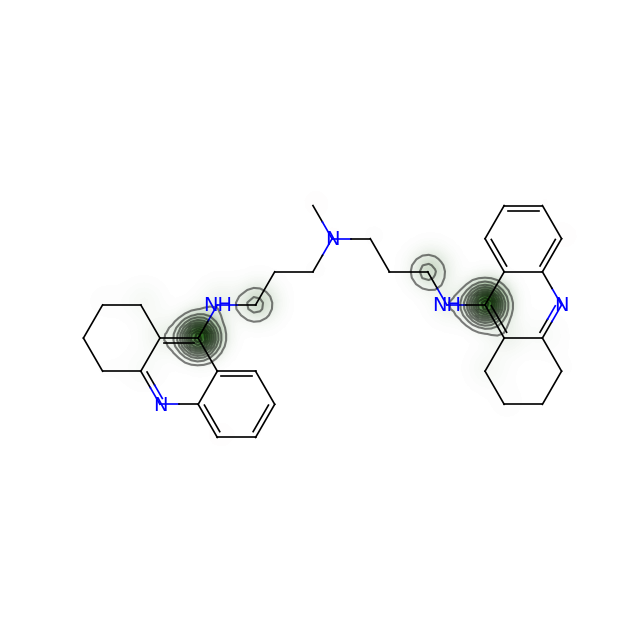

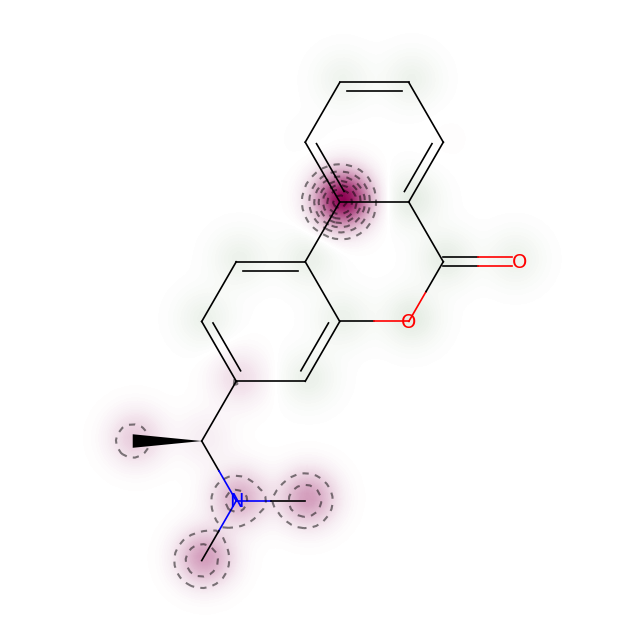

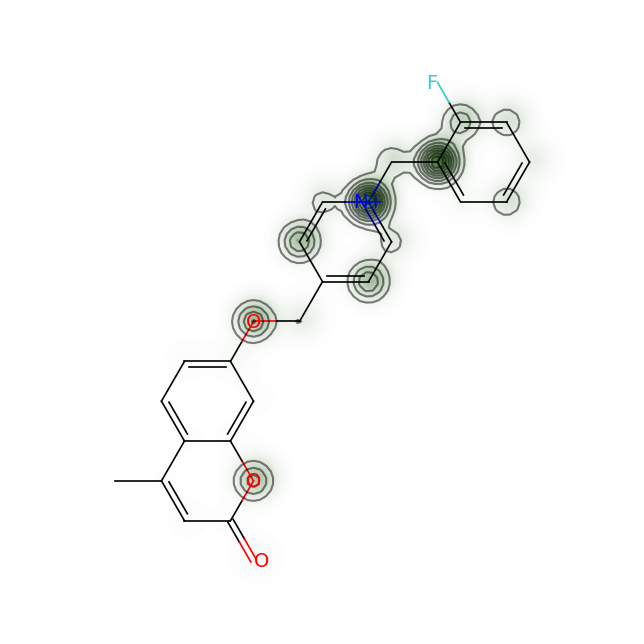

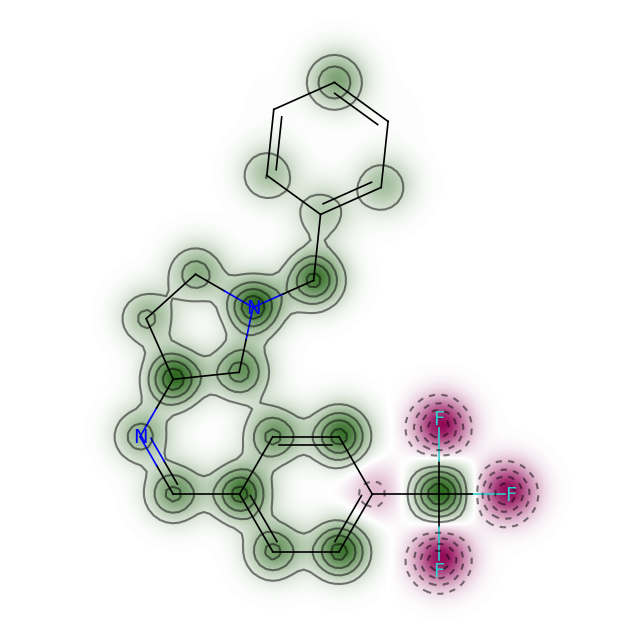

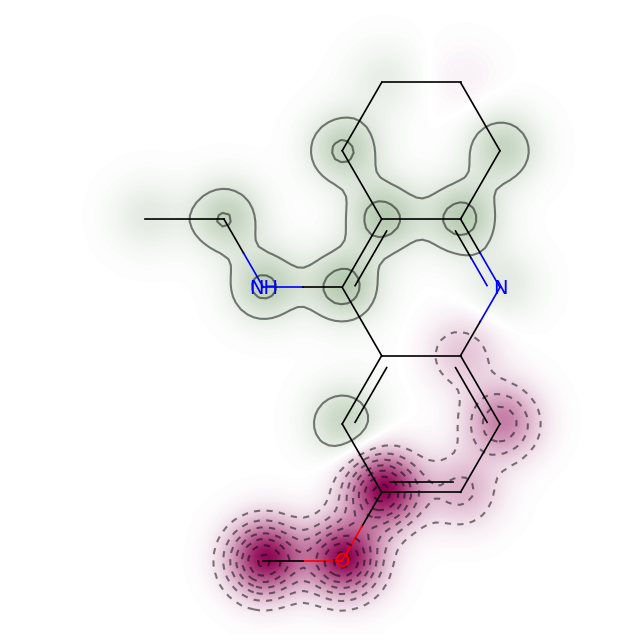

In [61]:
np.random.seed(2000)
maps = vis_contribs(np.random.choice(np.array(mols),5), df)

## Atomic contribution visualization for 10 selected compounds compounds

The method  and code for atomic contribution visualization is adopted from deep chem tutorial by P-Kelly available at (https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Atomic_Contributions_for_Molecules.ipynb)

In [64]:
df=pd.read_excel('/content/drive/MyDrive/Predictive-Generative-transfer learning/TransferAll/StandarizationOfDataset/StandarizedSmiles_cutOFF800daltonMolecularweight (1).xlsx')


In [65]:
# List of commonly known acetylcholinesterase inhibitor
chembl_ids = ['CHEMBL94', 'CHEMBL54126', 'CHEMBL636', 'CHEMBL113', 'CHEMBL659', 'CHEMBL95', 'CHEMBL1128', 'CHEMBL1255901','CHEMBL502', 'CHEMBL75013', 'CHEMBL359570', 'CHEMBL75013']

# Select rows where the 'chembl_id' column is in the list of ChEMBL IDs
specific_rows = df[df['Molecule ChEMBL ID'].isin(chembl_ids)]

In [66]:
specific_rows

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e880b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C
6,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,45.10,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e886d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.127724,0.704160,46.677559,-14.388085,198.269,102,Nc1c2c(nc3ccccc13)CCCC2
13,CHEMBL1255901,C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,5.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e889e0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.862149,-0.194694,44.483814,-62.283508,242.322,11,C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2
35,CHEMBL502,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,10.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e89380>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.143176,2.991514,-19.889893,39.802578,379.500,69,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2
80,CHEMBL75013,O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCCCC2,194.98,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e8a7a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.595382,3.203060,-18.351171,63.905125,376.544,3,O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCCCC2
143,CHEMBL659,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2,2090.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e84660>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.604482,-0.005219,-90.199371,0.473097,287.359,25,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2
387,CHEMBL636,CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1,3030.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e8fd10>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.223036,-1.661954,-41.192120,-19.056494,250.342,25,CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1
446,CHEMBL54126,CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1.[Br-],31.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd93d59a0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.028787,-1.489257,-35.039322,-12.825727,303.200,9,CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1
1000,CHEMBL1128,CC[N+](C)(C)c1cccc(O)c1.[Cl-],5000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd94033e0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.511788,-0.445985,-15.730544,-7.273246,201.697,3,CC[N+](C)(C)c1cccc(O)c1
2234,CHEMBL359570,O=C1Cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc2N1,0.33,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7bcfd8e74b30>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.638255,3.542295,5.936545,74.968567,375.472,3,Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1


In [68]:
specific_rows.reset_index(drop=True, inplace=True)

In [96]:
specific_rows

,Molecule ChEMBL ID,Smiles,IC50,classLabel,IsValidSMILES,Morgan_FP,Molecule,Fingerprint,PCA1,PCA2,tSNE1,tSNE2,MolecularWeight,Frequency,cleanedMol,Name,logP50
0,CHEMBL94,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,28.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e92f80>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.738898,-1.494784,-52.761700,-42.736099,275.352,27,CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,MolID_0,28.00
1,CHEMBL95,Nc1c2c(nc3ccccc13)CCCC2,45.10,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e93300>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,3.127724,0.704160,46.677559,-14.388085,198.269,102,Nc1c2c(nc3ccccc13)CCCC2,MolID_1,45.10
2,CHEMBL1255901,C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,5.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e93060>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.862149,-0.194694,44.483814,-62.283508,242.322,11,C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,MolID_2,5.00
3,CHEMBL502,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,10.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e930d0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.143176,2.991514,-19.889893,39.802578,379.500,69,COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2,MolID_3,10.00
4,CHEMBL75013,O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCCCC2,194.98,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e93140>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.595382,3.203060,-18.351171,63.905125,376.544,3,O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCCCC2,MolID_4,194.98
5,CHEMBL659,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2,2090.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e931b0>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.604482,-0.005219,-90.199371,0.473097,287.359,25,COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2,MolID_5,2090.00
6,CHEMBL636,CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1,3030.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e92490>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.223036,-1.661954,-41.192120,-19.056494,250.342,25,CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1,MolID_6,3030.00
7,CHEMBL54126,CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1.[Br-],31.00,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e93290>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-1.028787,-1.489257,-35.039322,-12.825727,303.200,9,CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1,MolID_7,31.00
8,CHEMBL1128,CC[N+](C)(C)c1cccc(O)c1.[Cl-],5000.00,0,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e93220>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.511788,-0.445985,-15.730544,-7.273246,201.697,3,CC[N+](C)(C)c1cccc(O)c1,MolID_8,5000.00
9,CHEMBL359570,O=C1Cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)noc3cc2N1,0.33,1,True,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,<rdkit.Chem.rdchem.Mol object at 0x7b8235e93370>,<rdkit.DataStructs.cDataStructs.ExplicitBitVec...,-0.638255,3.542295,5.936545,74.968567,375.472,3,Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,MolID_9,0.33


In [97]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools

specific_rows['Molecule'] = [Chem.MolFromSmiles(smiles) for smiles in specific_rows['cleanedMol']]

specific_rows['Name'] = [f'MolID_{index}' for index in specific_rows.index]
specific_rows['logP50'] = specific_rows['IC50']  # Use your own column name for logP50 or logBB
specific_rows['classLabel'] = specific_rows['classLabel']  # Use your own column name for class label

PandasTools.WriteSDF(specific_rows, 'output2.sdf', molColName='Molecule', idName='Name', properties=['classLabel', 'logP50'])

print("SDF file created: 'output2.sdf'")


SDF file created: 'output2.sdf'


In [98]:
import os
import pandas as pd
import deepchem as dc
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw, PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
from deepchem import metrics
from IPython.display import Image, display
from rdkit.Chem.Draw import SimilarityMaps
import tensorflow as tf

path2= '/content/output2.sdf'
# Create RDKit mol objects, since we will need them later.
mols = [m for m in Chem.SDMolSupplier(path2) if m is not None ]
loader2 = dc.data.SDFLoader(tasks=["classLabel"],
                           featurizer=dc.feat.ConvMolFeaturizer(),
                           sanitize=True)
datasets2 = loader2.create_dataset(path2, shard_size=2000)


In [99]:
loader3 = dc.data.SDFLoader(tasks=[],# dont need task (moreover, passing the task can lead to inconsitencies in data shapes)
                        featurizer=dc.feat.ConvMolFeaturizer(per_atom_fragmentation=True),
                        sanitize=True)
frag_dataset2 = loader3.create_dataset(path2, shard_size=5000)

In [100]:
frag_dataset2

<DiskDataset X.shape: (10,), y.shape: (), w.shape: (), ids: ['CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C' 'Nc1c2c(nc3ccccc13)CCCC2'
 'C/C=C1\\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2'
 'COc1cc2c(cc1OC)C(=O)C(CC1CCN(Cc3ccccc3)CC1)C2'
 'O=C(CCC1CCN(Cc2ccccc2)CC1)c1ccc2c(c1)NCCCC2'
 'COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2'
 'CCN(C)C(=O)Oc1cccc([C@H](C)N(C)C)c1' 'CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1'
 'CC[N+](C)(C)c1cccc(O)c1' 'Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1'], task_names: []>

In [101]:
tr = dc.trans.FlatteningTransformer(frag_dataset2)
frag_dataset2 = tr.transform(frag_dataset2)
print(frag_dataset2.X.shape)

(204,)


In [102]:
# whole  molecules
pred = np.squeeze(model.predict(datasets2))[:, 1] # probabilitiy of class 1
pred = pd.DataFrame(pred, index=datasets2.ids, columns=["Molecule"])  # turn to dataframe for convinience

# fragments
pred_frags2 = np.squeeze(model.predict(frag_dataset2))[:, 1]
pred_frags2 = pd.DataFrame(pred_frags2, index=frag_dataset2.ids, columns=["Fragment"])

In [103]:
pred_frags2

,Fragment
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.908793
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.058614
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.370627
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.025087
CNC(=O)Oc1ccc2c(c1)[C@]1(C)CCN(C)[C@@H]1N2C,0.011104
...,...
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.987788
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.702740
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.935213
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.924425


In [104]:
# merge 2 dataframes by molecule names
df2 = pd.merge(pred_frags2, pred, right_index=True, left_index=True)
# find contribs
df2['Contrib'] = df2["Molecule"] - df2["Fragment"]

In [106]:
df2

,Fragment,Molecule,Contrib
C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,0.983693,0.988943,0.005250
C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,0.518711,0.988943,0.470232
C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,0.016054,0.988943,0.972888
C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,0.016487,0.988943,0.972456
C/C=C1\[C@H]2C=C(C)C[C@@]1(N)c1ccc(=O)[nH]c1C2,0.495051,0.988943,0.493892
...,...,...,...
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.987788,0.997696,0.009909
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.702740,0.997696,0.294956
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.935213,0.997696,0.062484
Oc1cc2cc3c(CCC4CCN(Cc5ccccc5)CC4)[nH]oc3cc2n1,0.924425,0.997696,0.073271


In [107]:
def vis_contribs(mols, df, smi_or_sdf = "sdf"):
    maps = []
    for mol  in mols:
        wt = {}
        if smi_or_sdf == "smi":
            for n,atom in enumerate(Chem.rdmolfiles.CanonicalRankAtoms(mol)):
                wt[atom] = df2.loc[mol.GetProp("_Name"),"Contrib"][n]
        if smi_or_sdf == "sdf":
            for n,atom in enumerate(range(mol.GetNumHeavyAtoms())):
                wt[atom] = df2.loc[Chem.MolToSmiles(mol),"Contrib"][n]
        maps.append(SimilarityMaps.GetSimilarityMapFromWeights(mol,wt))
    return maps

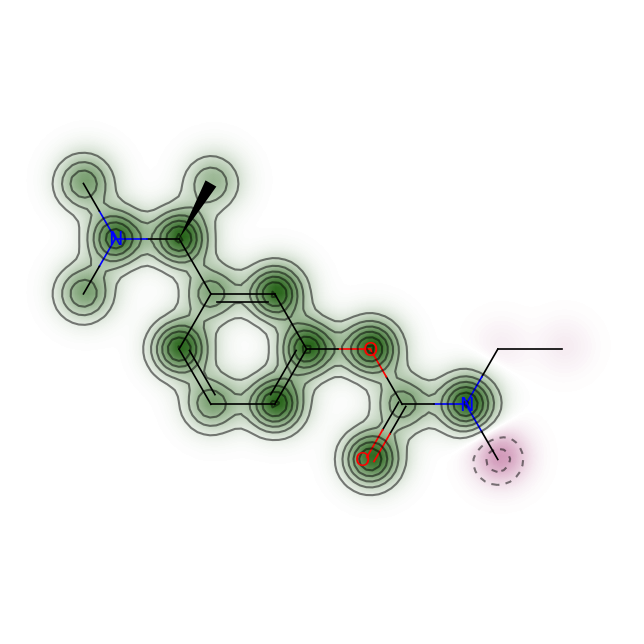

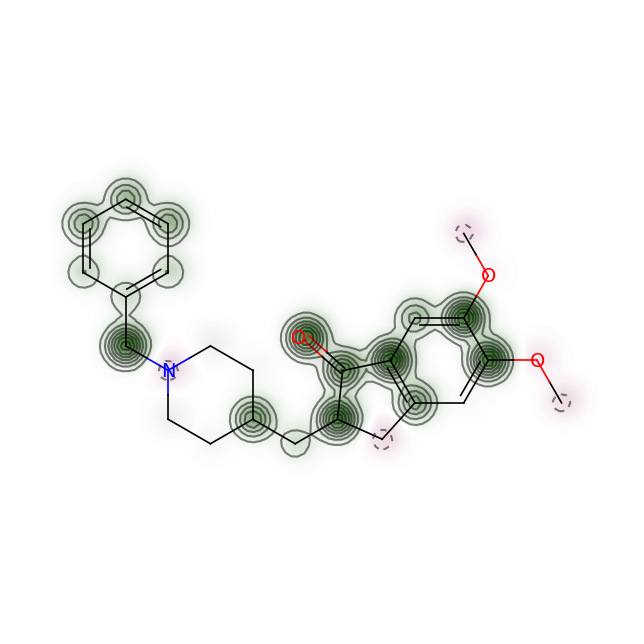

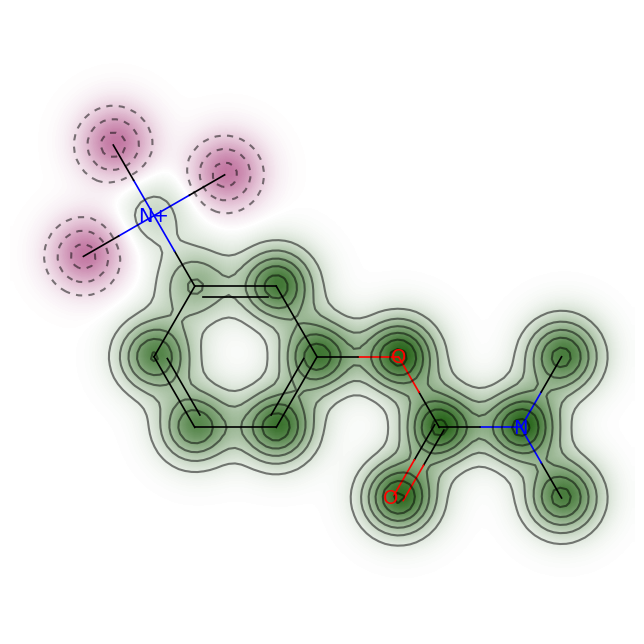

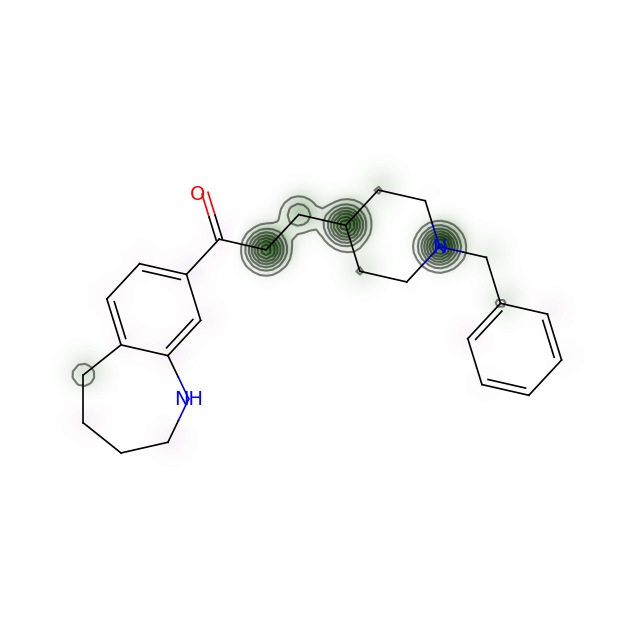

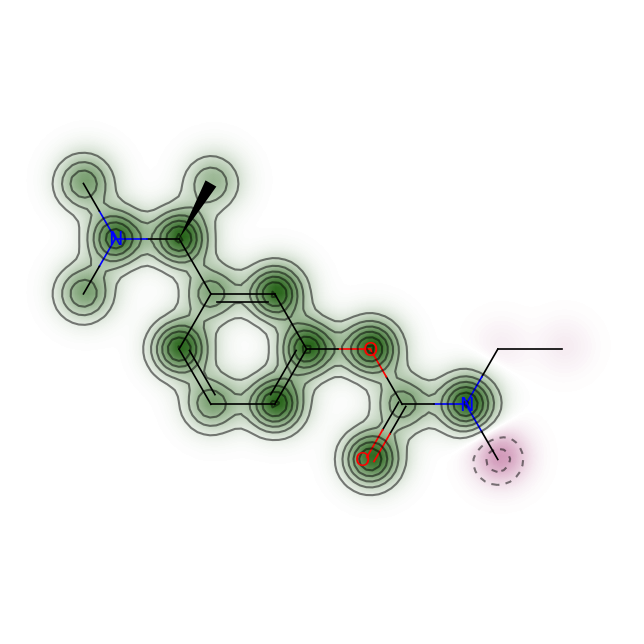

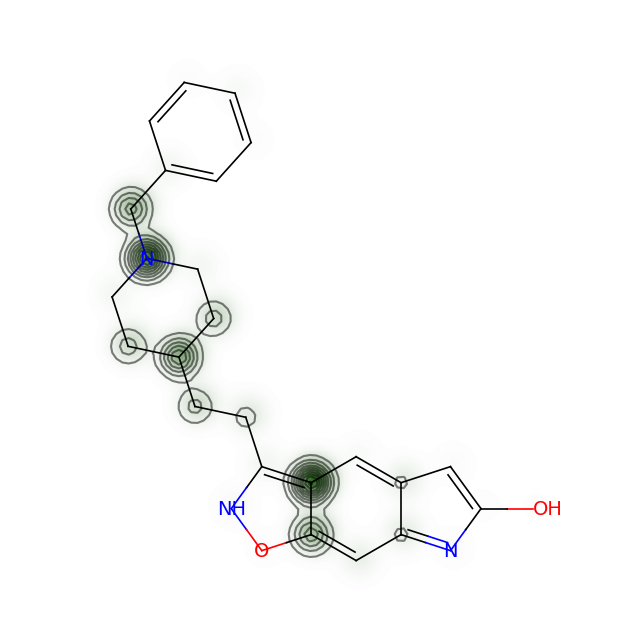

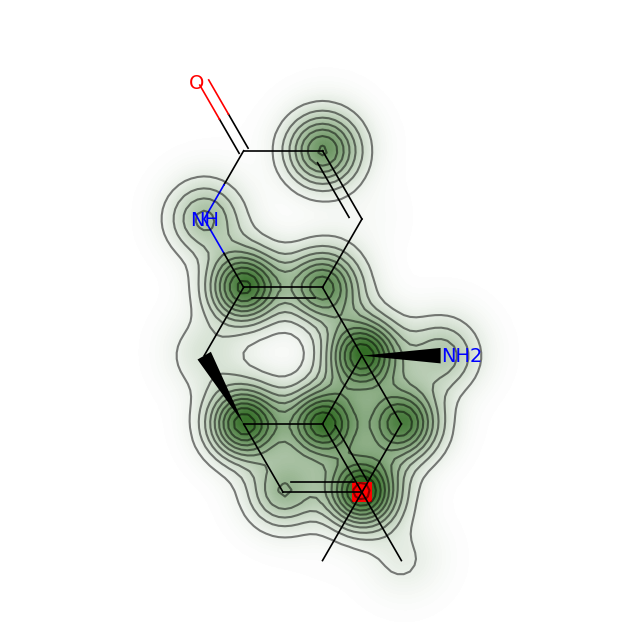

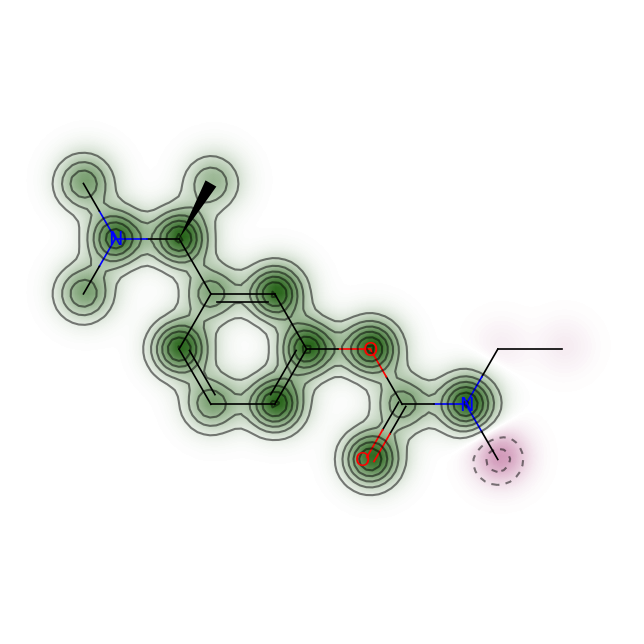

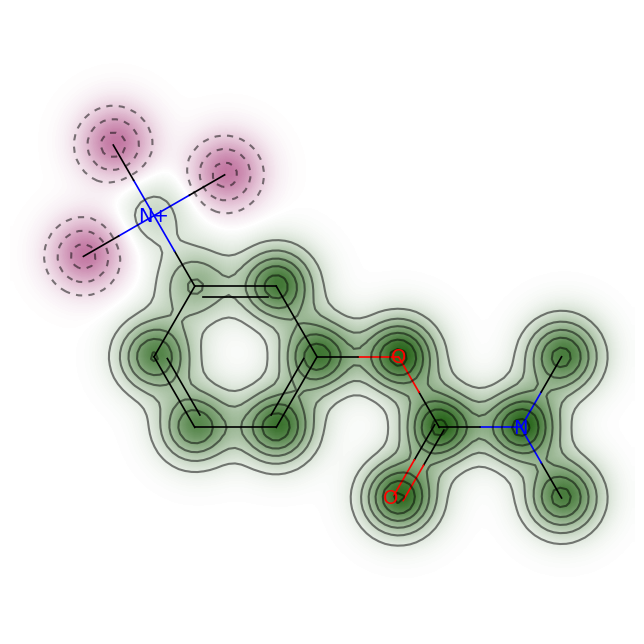

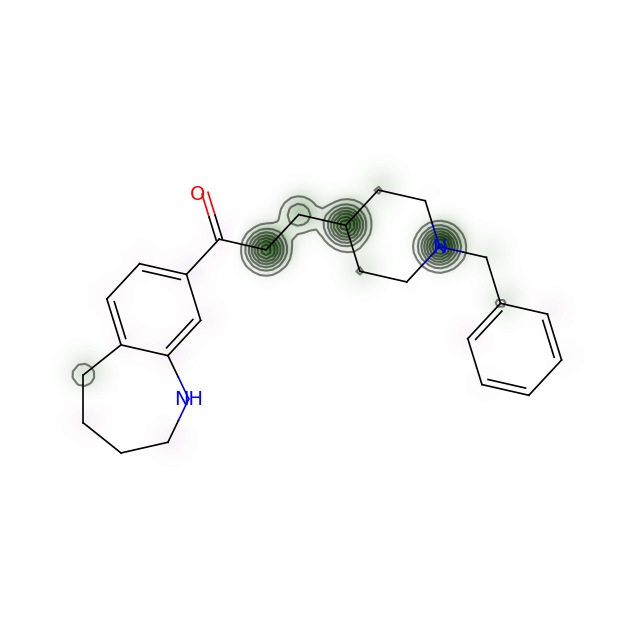

In [110]:
np.random.seed(42)
maps = vis_contribs(np.random.choice(np.array(mols),10), df2)

##References

* https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Graph_Convolutions.ipynb
* Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., & Wu, Z. (2019). Deep Learning for the Life Sciences. O’Reilly Media. https://www.amazon.com/Deep-Learning-Life-Sciences-Microscopy/dp/1492039837
* Vignaux, P. A., Lane, T. R., Urbina, F., Gerlach, J., Puhl, A. C., Snyder, S. H., & Ekins, S. (2023). Validation of Acetylcholinesterase Inhibition Machine Learning Models for Multiple Species. Chemical Research in Toxicology, 36(2), 188–201. https://doi.org/10.1021/acs.chemrestox.2c00283
* Duvenaud, D., Maclaurin, D., Aguilera-Iparraguirre, J., Gómez-Bombarelli, R., Hirzel, T., Aspuru-Guzik, A., & Adams, R. P. (2015). Convolutional Networks on Graphs for Learning Molecular Fingerprints (arXiv:1509.09292). arXiv. http://arxiv.org/abs/1509.09292
* Durant, J. L., Leland, B. A., Henry, D. R., & Nourse, J. G. (2002). Reoptimization of MDL Keys for Use in Drug Discovery. Journal of Chemical Information and Computer Sciences, 42(6), 1273–1280. https://doi.org/10.1021/ci010132r
*   https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Atomic_Contributions_for_Molecules.ipynb


